#**Lab Assignment No 3: Fourier Transforms and Filtering**

In [0]:
#Code Belongs to RAJAT KHANNA (2017UCS0050)
#IMPORTING LIBRARIES
import pandas as pd
import math
import PIL
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [0]:
#LINKING COLAB TO DRIVE
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


*1.In this homework, we want to analyze the energy distributions of different types of
images.*

In [0]:
lena = "/content/drive/My Drive/CVassignment-3/lena.jpg"
iris = "/content/drive/My Drive/CVassignment-3/iris-illustration.jpg"

In [0]:
lenaImage = imread(lena)
irisImage = imread(iris)
lenaImageGray = cv2.cvtColor(lenaImage,cv2.COLOR_BGR2GRAY)
irisImageGray = cv2.cvtColor(irisImage,cv2.COLOR_BGR2GRAY)

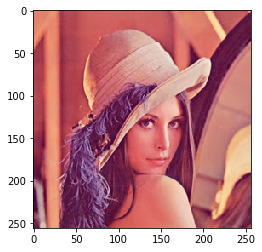

In [0]:
plt.imshow(lenaImage)

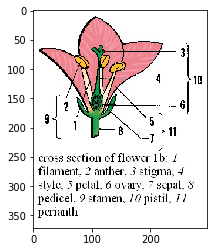

In [0]:
plt.imshow(irisImage)

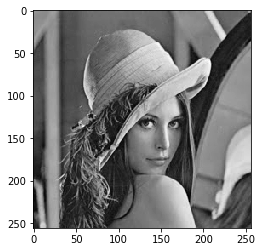

In [0]:
plt.imshow(lenaImageGray, cmap = 'gray')

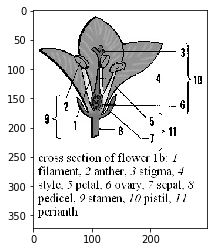

In [0]:
plt.imshow(irisImageGray, cmap = 'gray')

*(a) First, convert the input color image to the grayscale format. Plot the log magnitude of
the 2D DFT of the grayscale image, with center shifted.*

*(d) Repeat the above processes for both lena and iris images shown above. Discuss the
differences between these two types of images, i.e., natural photos vs. diagrams.*

[DFT Blog](https://github.com/abidrahmank/OpenCV2-Python-Tutorials/blob/master/source/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.rst)

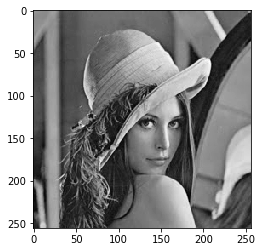

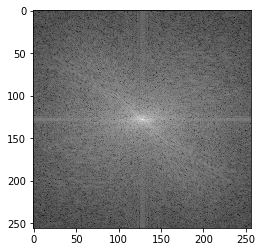

In [0]:
#2D dft of Lena

#2D-DFT using FFT
dftLena = cv2.dft(np.float32(lenaImageGray),flags = cv2.DFT_COMPLEX_OUTPUT)
dftShiftLena = np.fft.fftshift(dftLena)

SpectrumLena = 20*np.log(cv2.magnitude(dftShiftLena[:,:,0],dftShiftLena[:,:,1]))
plt.figure();plt.imshow(lenaImageGray, cmap = 'gray');
plt.figure();plt.imshow(SpectrumLena, cmap = 'gray');

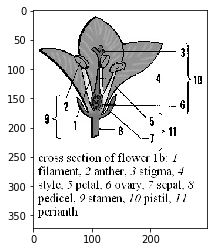

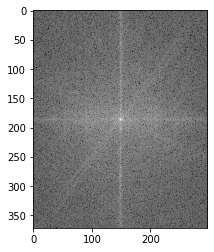

In [0]:
#2D dft of Iris

#2D-DFT using FFT
dftIris = cv2.dft(np.float32(irisImageGray),flags = cv2.DFT_COMPLEX_OUTPUT)
dftShiftIris = np.fft.fftshift(dftIris)

SpectrumIris = 20*np.log(cv2.magnitude(dftShiftIris[:,:,0],dftShiftIris[:,:,1]))
plt.figure();plt.imshow(irisImageGray, cmap = 'gray');
plt.figure();plt.imshow(SpectrumIris, cmap = 'gray');

*(b) Then apply the truncation windows discussed in the class to keep 25%, 12.5%, and
6.25% of the DFT coefficients.*

*(c) Apply the 2D inverse DFT to reconstruct the image for each of the truncated spectra.
Plot the reconstructed images. Compute the SNR value for each of the reconstructed
images.*

In [0]:
#PSNR value
def psnr(img1, img2):
  mse = np.mean( (img1 - img2) ** 2 )
  if mse == 0:
    return 100
  PIXEL_MAX = 255.0
  return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

-89.70131933807053


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


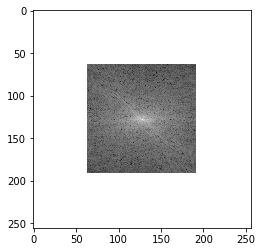

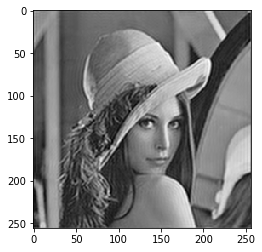

In [0]:
#making a Trucation 25%

#initialize by zeros
dftLenaTruncation1 = np.zeros(dftShiftLena.shape)

for i in range(dftLenaTruncation1.shape[0]//4,3*dftLenaTruncation1.shape[0]//4):
  for j in range(dftLenaTruncation1.shape[1]//4,3*dftLenaTruncation1.shape[1]//4):
    for k in range(0,2):
      dftLenaTruncation1[i][j][k] = dftShiftLena[i][j][k]

#This is the magnitude Spectrum
SpectrumLenaTruncation1 = 20*np.log(cv2.magnitude(dftLenaTruncation1[:,:,0],dftLenaTruncation1[:,:,1]))

#Inverse Fourier Transform
InverseLenaTruncation1 = np.fft.ifftshift(dftLenaTruncation1)
LenaTruncation1 = cv2.idft(InverseLenaTruncation1)
LenaTruncation1 = cv2.magnitude(LenaTruncation1[:,:,0],LenaTruncation1[:,:,1])

#Plotting The MagnitudeSpectrum and Image
plt.figure();plt.imshow(SpectrumLenaTruncation1, cmap = 'gray');
plt.figure();plt.imshow(LenaTruncation1, cmap = 'gray');

#Calculating PSNR value
print(psnr(lenaImageGray,LenaTruncation1))

-89.66816682529753


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


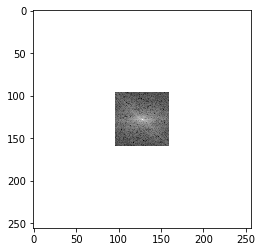

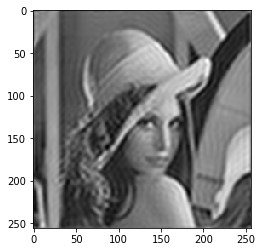

In [0]:
#making a Trucation 12.5%

dftLenaTruncation2 = np.zeros(dftShiftLena.shape)

for i in range(3*dftLenaTruncation2.shape[0]//8,5*dftLenaTruncation2.shape[0]//8):
  for j in range(3*dftLenaTruncation2.shape[1]//8,5*dftLenaTruncation2.shape[1]//8):
    for k in range(0,2):
      dftLenaTruncation2[i][j][k] = dftShiftLena[i][j][k]
    
SpectrumLenaTruncation2 = 20*np.log(cv2.magnitude(dftLenaTruncation2[:,:,0],dftLenaTruncation2[:,:,1]))

InverseLenaTruncation2 = np.fft.ifftshift(dftLenaTruncation2)
LenaTruncation2 = cv2.idft(InverseLenaTruncation2)
LenaTruncation2 = cv2.magnitude(LenaTruncation2[:,:,0],LenaTruncation2[:,:,1])

plt.figure();plt.imshow(SpectrumLenaTruncation2, cmap = 'gray');
plt.figure();plt.imshow(LenaTruncation2, cmap = 'gray');

print(psnr(lenaImageGray,LenaTruncation2))

-89.61018024293375


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


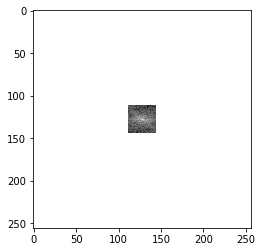

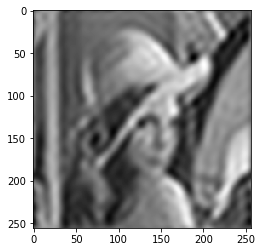

In [0]:
#making a Trucation 6.25%

dftLenaTruncation3 = np.zeros(dftShiftLena.shape)

for i in range(7*dftLenaTruncation3.shape[0]//16,9*dftLenaTruncation3.shape[0]//16):
  for j in range(7*dftLenaTruncation3.shape[1]//16,9*dftLenaTruncation3.shape[1]//16):
    for k in range(0,2):
      dftLenaTruncation3[i][j][k] = dftShiftLena[i][j][k]
    
SpectrumLenaTruncation3 = 20*np.log(cv2.magnitude(dftLenaTruncation3[:,:,0],dftLenaTruncation3[:,:,1]))

InverseLenaTruncation3 = np.fft.ifftshift(dftLenaTruncation3)
LenaTruncation3 = cv2.idft(InverseLenaTruncation3)
LenaTruncation3 = cv2.magnitude(LenaTruncation3[:,:,0],LenaTruncation3[:,:,1])

plt.figure();plt.imshow(SpectrumLenaTruncation3, cmap = 'gray');
plt.figure();plt.imshow(LenaTruncation3, cmap = 'gray');

print(psnr(lenaImageGray,LenaTruncation3))


-100.06811442973599


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


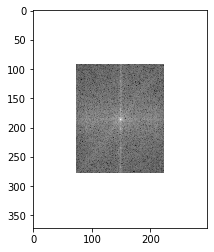

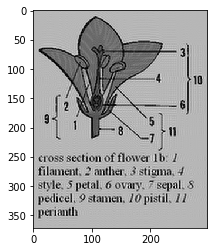

In [0]:
dftIrisTruncation1 = np.zeros(dftShiftIris.shape)

for i in range(dftIrisTruncation1.shape[0]//4,3*dftIrisTruncation1.shape[0]//4):
  for j in range(dftIrisTruncation1.shape[1]//4,3*dftIrisTruncation1.shape[1]//4):
    for k in range(0,2):
      dftIrisTruncation1[i][j][k] = dftShiftIris[i][j][k]
    
SpectrumIrisTruncation1 = 20*np.log(cv2.magnitude(dftIrisTruncation1[:,:,0],dftIrisTruncation1[:,:,1]))

InverseIrisTruncation1 = np.fft.ifftshift(dftIrisTruncation1)
IrisTruncation1 = cv2.idft(InverseIrisTruncation1)
IrisTruncation1 = cv2.magnitude(IrisTruncation1[:,:,0],IrisTruncation1[:,:,1])

plt.figure();plt.imshow(SpectrumIrisTruncation1, cmap = 'gray');
plt.figure();plt.imshow(IrisTruncation1, cmap = 'gray');

print(psnr(irisImageGray,IrisTruncation1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


-99.97128044822395


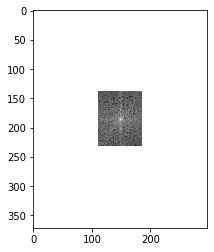

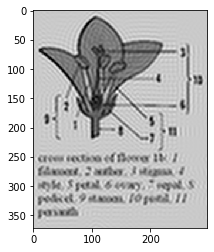

In [0]:
dftIrisTruncation2 = np.zeros(dftShiftIris.shape)

for i in range(3*dftIrisTruncation2.shape[0]//8,5*dftIrisTruncation2.shape[0]//8):
  for j in range(3*dftIrisTruncation2.shape[1]//8,5*dftIrisTruncation2.shape[1]//8):
    for k in range(0,2):
      dftIrisTruncation2[i][j][k] = dftShiftIris[i][j][k]
    
SpectrumIrisTruncation2 = 20*np.log(cv2.magnitude(dftIrisTruncation2[:,:,0],dftIrisTruncation2[:,:,1]))

InverseIrisTruncation2 = np.fft.ifftshift(dftIrisTruncation2)
IrisTruncation2 = cv2.idft(InverseIrisTruncation2)
IrisTruncation2 = cv2.magnitude(IrisTruncation2[:,:,0],IrisTruncation2[:,:,1])

plt.figure();plt.imshow(SpectrumIrisTruncation2, cmap = 'gray');
plt.figure();plt.imshow(IrisTruncation2, cmap = 'gray');

print(psnr(irisImageGray,IrisTruncation2))

-99.91940517661004


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


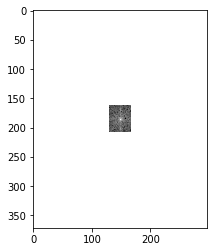

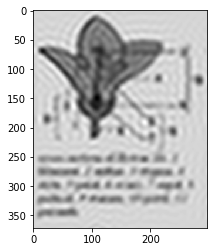

In [0]:
dftIrisTruncation3 = np.zeros(dftShiftIris.shape)

for i in range(7*dftIrisTruncation3.shape[0]//16,9*dftIrisTruncation3.shape[0]//16):
  for j in range(7*dftIrisTruncation3.shape[1]//16,9*dftIrisTruncation3.shape[1]//16):
    for k in range(0,2):
      dftIrisTruncation3[i][j][k] = dftShiftIris[i][j][k]
    
SpectrumIrisTruncation3 = 20*np.log(cv2.magnitude(dftIrisTruncation3[:,:,0],dftIrisTruncation3[:,:,1]))

InverseIrisTruncation3 = np.fft.ifftshift(dftIrisTruncation3)
IrisTruncation3 = cv2.idft(InverseIrisTruncation3)
IrisTruncation3 = cv2.magnitude(IrisTruncation3[:,:,0],IrisTruncation3[:,:,1])

plt.figure();plt.imshow(SpectrumIrisTruncation3, cmap = 'gray');
plt.figure();plt.imshow(IrisTruncation3, cmap = 'gray');

print(psnr(irisImageGray,IrisTruncation3))

*2. Analysing DFT: Choose a 64x64 image and find the Discrete Fourier Transform for the
image. Now Add 64 columns and rows of zeros to the right and bottom side of the original
image. Now find the DFT of this new image again. Repeat this process 2 more times each
time doubling the image size and padding the pixels on the right and bottom by zeroes. You
will therefore have 4 images – first one 64 x 64 with no zero padding and then 128x128,
256x256 and 512 x 512 after padding. Find the DFTs of all these images. Show all your
results in the pdf file and explain the relationship between the four DFTs you get. Justify the
relationship you discover.*


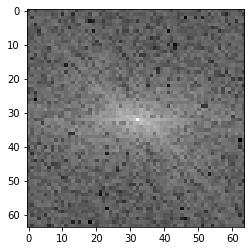

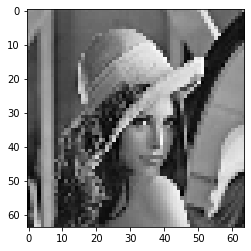

In [0]:
#Resizing into 64X64 and then taking DFT
lenaImageGray64 = cv2.resize(lenaImageGray,(64,64))

dftLena64 = cv2.dft(np.float32(lenaImageGray64),flags = cv2.DFT_COMPLEX_OUTPUT)
dftShiftLena64 = np.fft.fftshift(dftLena64)

Spectrumlena64 = 20*np.log(cv2.magnitude(dftShiftLena64[:,:,0],dftShiftLena64[:,:,1]))

plt.figure();plt.imshow(Spectrumlena64, cmap = 'gray');
plt.figure();plt.imshow(lenaImageGray64, cmap = 'gray');

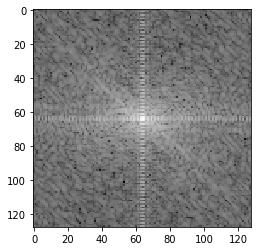

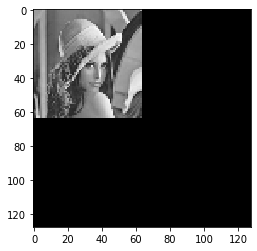

In [0]:
#Padding to make image of size 128X128 and taking DFT
lenaImageGray128 = np.zeros((128,128))

for i in range(0,64):
  for j in range(0,64):
    lenaImageGray128[i][j] = lenaImageGray64[i][j]

dftLena128 = cv2.dft(np.float32(lenaImageGray128),flags = cv2.DFT_COMPLEX_OUTPUT)
dftShiftLena128 = np.fft.fftshift(dftLena128)

Spectrumlena128 = 20*np.log(cv2.magnitude(dftShiftLena128[:,:,0],dftShiftLena128[:,:,1]))

plt.figure();plt.imshow(Spectrumlena128, cmap = 'gray');
plt.figure();plt.imshow(lenaImageGray128, cmap = 'gray');

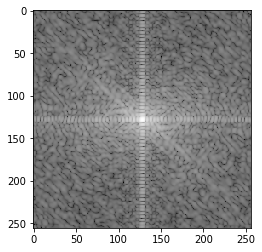

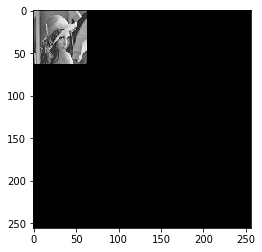

In [0]:
#Padding to make image of size 256X256 and taking DFT
lenaImageGray256 = np.zeros((256,256))

for i in range(0,64):
  for j in range(0,64):
    lenaImageGray256[i][j] = lenaImageGray64[i][j]

dftLena256 = cv2.dft(np.float32(lenaImageGray256),flags = cv2.DFT_COMPLEX_OUTPUT)
dftShiftLena256 = np.fft.fftshift(dftLena256)

Spectrumlena256 = 20*np.log(cv2.magnitude(dftShiftLena256[:,:,0],dftShiftLena256[:,:,1]))

plt.figure();plt.imshow(Spectrumlena256, cmap = 'gray');
plt.figure();plt.imshow(lenaImageGray256, cmap = 'gray');

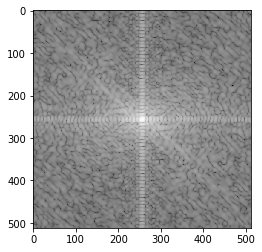

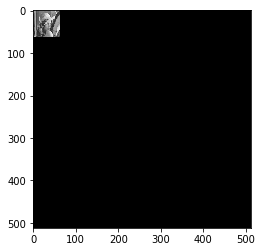

In [0]:
#Padding to make image of size 512X512 and taking DFT
lenaImageGray512 = np.zeros((512,512))

for i in range(0,64):
  for j in range(0,64):
    lenaImageGray512[i][j] = lenaImageGray64[i][j]

dftLena512 = cv2.dft(np.float32(lenaImageGray512),flags = cv2.DFT_COMPLEX_OUTPUT)
dftShiftLena512 = np.fft.fftshift(dftLena512)

Spectrumlena512 = 20*np.log(cv2.magnitude(dftShiftLena512[:,:,0],dftShiftLena512[:,:,1]))

plt.figure();plt.imshow(Spectrumlena512, cmap = 'gray');
plt.figure();plt.imshow(lenaImageGray512, cmap = 'gray');

##**Notch Filters**

*3. Notch Filters:
A band-pass filter is a filter that passes most frequencies, but attenuates those in a specific
range to very low levels. Notch filters are the most useful of the selective filters. A notch
filter rejects (or passes) frequencies in a predefined neighborhood of the frequency rectangle.
Notch filters are used to remove repetitive "Spectral" noise from an image are like a narrow
highpass filter, but they "notch" out frequencies other than the dc component attenuate a
selected frequency (and some of its neighbors) and leave other frequencies of the Fourier
transform relatively unchanged
Repetitive noise in an image is sometimes seen as a bright peak somewhere other than the
origin. You can suppress such noise effectively by carefully erasing the peaks. One way to do
this is to use a notch filter to simply remove that frequency from the picture. This technique is
very common in sound signal processing where it is used to remove mechanical or electronic
hum, such as the 60Hz hum from AC power. Although it is possible to create notch filters for
common noise patterns, in general notch filtering is an ad hoc procedure requiring a human
expert to determine what frequencies need to be removed to clean up the signal.*

*You are required to implement notch filters and perform the processsing to remove spectral
noise for the images shown above.*



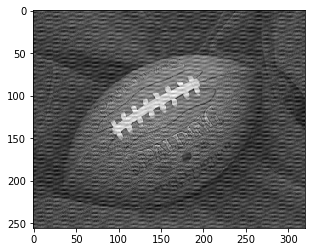

In [0]:
noiseball = "/content/drive/My Drive/CVassignment-3/noiseball.png"
noiseballImage = imread(noiseball)
plt.imshow(noiseballImage,cmap='gray')

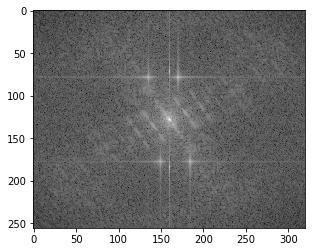

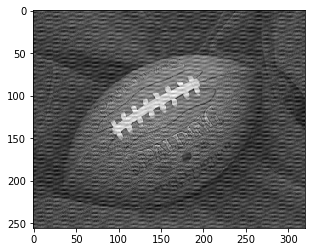

In [0]:
#Taking DFT of the image
dftnoiseball = cv2.dft(np.float32(noiseballImage),flags = cv2.DFT_COMPLEX_OUTPUT)
dftShiftnoiseball = np.fft.fftshift(dftnoiseball)

Spectrumnoiseball = 20*np.log(cv2.magnitude(dftShiftnoiseball[:,:,0],dftShiftnoiseball[:,:,1]))

plt.figure();plt.imshow(Spectrumnoiseball, cmap = 'gray');
plt.figure();plt.imshow(noiseballImage, cmap = 'gray');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


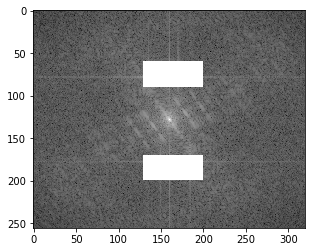

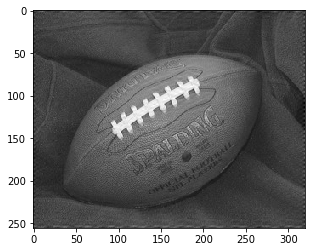

In [0]:
#Removing noise in the DFT by making white patches
dftShiftNoiseFree = dftShiftnoiseball
top1 = 60
top2 = 170
bottom1 = 90
bottom2 = 200
left = 130
right = 200

for i in range(top1,bottom1):
  for j in range(left,right):
    for k in range(0,2):
      dftShiftNoiseFree[i][j][k] = 0

for i in range(top2,bottom2):
  for j in range(left,right):
    for k in range(0,2):
      dftShiftNoiseFree[i][j][k] = 0

SpectrumNoiseFree = 20*np.log(cv2.magnitude(dftShiftNoiseFree[:,:,0],dftShiftNoiseFree[:,:,1]))

#converting back the DFT into a noise free image
fiNoiseFree= np.fft.ifftshift(dftShiftNoiseFree)
NoiseFreeImage = cv2.idft(fiNoiseFree)
NoiseFreeImage = cv2.magnitude(NoiseFreeImage[:,:,0],NoiseFreeImage[:,:,1])

plt.figure();plt.imshow(SpectrumNoiseFree, cmap = 'gray');
plt.figure();plt.imshow(NoiseFreeImage, cmap = 'gray');